In [2]:
# Import required packages
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# General definitions

## [Random variable](https://en.wikipedia.org/wiki/Random_variable)
 
 * It is a variable whose values depend on outcomes of a *random phenomenon*.
 * The domain of a random variable is a *sample space* (the set of possible outcomes of a random phenomenon).
 * A random variable has a *probability distribution* (function that gives the probabilities of occurrence of different possible outcomes).
 
The outcome of the roll of a dice is a *discrete random variable*, given that its *sample space* is the discrete set of values $\{1,2,3,4,5,6\}$. For discrete random variables we refer to the *probability distribution* function as a *probability mass* function. For the example of rolling a die, the [probability mass function is](https://mathinsight.org/probability_distribution_idea):

$$P(x)=
\begin{cases}
  \frac{1}{6}\; \mathrm{if}\; x \in \{1,2,3,4,5,6\}\\    
  0\; \mathrm{otherwise}
\end{cases}
$$



## [Stochastic process](https://en.wikipedia.org/wiki/Stochastic_process)

* The word *stochastic* is jargon (a synonym) for *random*.
* A **stochastic process** is a [mathematical object](https://en.wikipedia.org/wiki/Mathematical_object), usually defined as a *family of random variables*.
* This family of random variables can be written as $\{X_t\}$ where $t$ is a point in a space $T$ called the *parameter space*, and where, for each $t \in T$, $X_t$ is a point in a space $S$ called the *state space* ([Coleman  1974](https://link.springer.com/chapter/10.1007/978-94-010-9796-3_1)).
 


# Monte Carlo

The **[Monte Carlo](https://en.wikipedia.org/wiki/Monte_Carlo_method)** method consists in applying [
*random sampling*](https://en.wikipedia.org/wiki/Simple_random_sample) to solve a mathematical problem that is otherwise infeasible to solve, either because there is no analytical solution or because obtaining one is very difficult. It is also helpful when an *exact* solution is not mandatory and one is willing to trade precision for ease of implementation.

This tool is often used to solve complicated multi-dimensional integrals using the approximation (we use only one dimension here for simplicity):

$$I = \int_{a}^{b} f(x) dx \approx (b - a) \frac{1}{N} \sum_{i=1}^{N} f(x_i)\;\;\;\;\;\;[1]$$

By randomly sampling$^{[1]}$ $N$ values $x_i$ from the $[a, b]$ interval and evaluating them in $f(x)$, one can approximate the real value of $I$.

The example below solves the integral for the function $f(x)=cos(2\pi x^2) + 1$ in the $[0, 5]$ range. First, lets define the function:

-------------------------------------------------------------------------------
**[1]**: Why not just use a grid of values instead of random sampling? See: https://stats.stackexchange.com/q/13536/10416

In [3]:
def fx(x):
    return np.cos(2 * np.pi * x**2) + 1

Lets plot it to see how it looks in the specified range

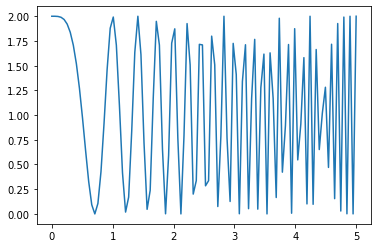

In [4]:
x = np.linspace(0., 5., 100)
plt.plot(x, fx(x))

Now we draw $N=1e5$ random samples $x_i$ from the $[0, 5]$ range

In [5]:
xi = np.random.uniform(0., 5., 100000)

and approximate the integral via Eq. [1], i.e., evaluate the samples in $f(x)$, obtain its mean, and multiply it by the range:

In [6]:
integ = (5. - 0.) * fx(xi).mean()
print("Integral: {:.5f}".format(integ))

Integral: 5.25618


The result given by [WolframAlpha](https://www.wolframalpha.com/input/?i=integrate+cos%282*Pi*x**2%29%2B1+from+x%3D0+to+5) is 5.24995, which is reasonably close.

# Markov Chains


* The [**Markov property**](https://en.wikipedia.org/wiki/Markov_property) refers to the [memoryless](https://en.wikipedia.org/wiki/Memorylessness) property of a *stochastic process*. This can be written as:

$$P(X_n=i_n|X_0=i_0,X_1=i_1,X_2=i_2,...,X_{n-1}=i_{n-1}) = P(X_n=i_n|X_{n-1}=i_{n-1})$$

This means that the probability of the current state $X_n$ being equal to $i_n$ given knowledge of *all* the previous states ($i_0,i_1,...,i_{n-1}$) is **equal** to the probability obtained given knowledge of *just the previous* state ($i_{n-1}$)

In other words, knowledge of the previous state is all that is necessary to determine the probability distribution of the current state ([Brilliant](https://brilliant.org/wiki/markov-chains/)).

# Markov Chain Monte Carlo


A simple description of what is *Markov Chain Monte–Carlo (MCMC)* can be found in [Ravenzwaaij, Cassey & Brown (2018)](https://link.springer.com/article/10.3758/s13423-016-1015-8):

> MCMC is a computer–driven sampling method (that) allows one to characterize a distribution without knowing all of the distribution's mathematical properties, by randomly sampling values out of the distribution. (..) It can be used to draw samples from distributions even when all that is known about the distribution is how to calculate the density for different samples.

In short:

***MCMC is a method to characterize a distribution when all we know is how to draw samples from it.***

At first this might sound counter-intuitive: if I can draw samples from my distribution, why do I need MCMC at all?

# Bayesian inference